# Segmentação da imagem com base no histograma

## Mascaramento

Forma de segmentação onde uma imagem binária (pixels preto e branco) é criada a partir da imagem original, colorida ou tins de cinza, para indicar os pixels de interesse e seprá-los dos pixels de fundo. No OpenCV essa imagem binária, chamada de máscara ou *mask*, é representada através de uma imagem em tons de cinza convencional, onde o valor preto `0` indica pixel de fundo e o valor branco `255` é usado para indicar o pixel de interesse.

Por exemplo vamos tentar marcar as diferentes cores em uma máscara

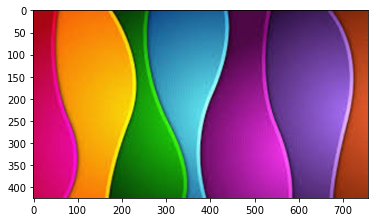

In [1]:
import cv2
import matplotlib.pyplot as plt

# Já invertendo os canais
cores_rgb = cv2.imread("cores.jpg")[:,:,::-1]
plt.imshow(cores_rgb)
plt.show()

Vamos ver o histograma de cada canal.

Canal vermelho

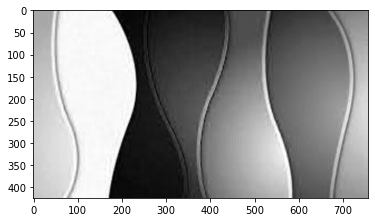

In [2]:
cores_r = cores_rgb[:,:,0]
plt.imshow(cores_r, cmap='gray')
plt.show()

Histograma

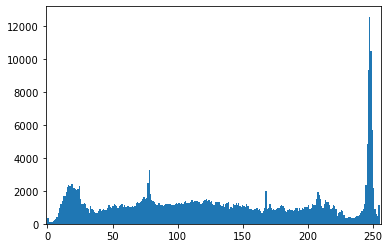

In [3]:
plt.hist(cores_r.flatten(), bins=256)
plt.xlim([-1,256]) # para melhor visualização do histograma
plt.show()

Canal verde

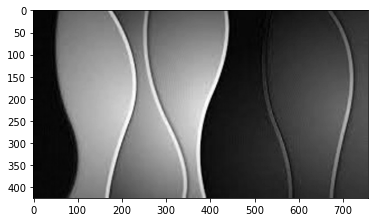

In [4]:
cores_g = cores_rgb[:,:,1]
plt.imshow(cores_g, cmap='gray')
plt.show()

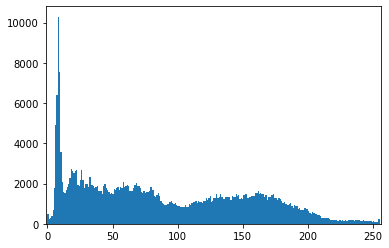

In [5]:
plt.hist(cores_g.flatten(), bins=256)
plt.xlim([-1,256])
plt.show()

Canal azul

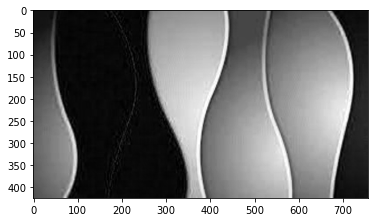

In [6]:
cores_b = cores_rgb[:,:,2]
plt.imshow(cores_b, cmap='gray')
plt.show()

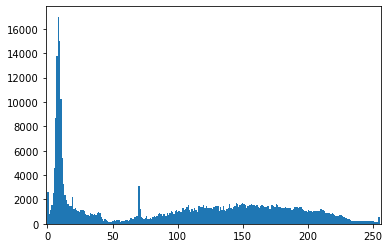

In [7]:
plt.hist(cores_b.flatten(), bins=256)
plt.xlim([-1,256])
plt.show()

Identificando os pixels da cor verde

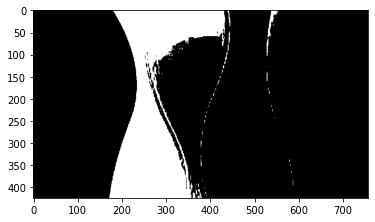

In [8]:
import numpy as np
# Cria uma imagem 'zerada' com as mesmas dimensões de 'cores_r'
mask_red = np.zeros_like(cores_r)
mask_red[cores_r < 45] = 255

plt.imshow(mask_red, cmap='gray')
plt.show()

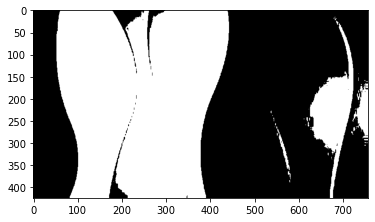

In [10]:
mask_green = np.zeros_like(cores_g)
mask_green[cores_g > 80] = 255

plt.imshow(mask_green, cmap='gray')
plt.show()

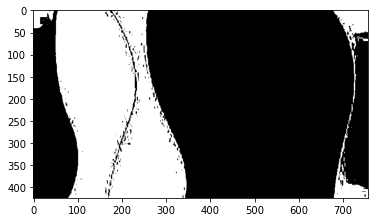

In [11]:
mask_blue = np.zeros_like(cores_b)
mask_blue[cores_b < 20] = 255

plt.imshow(mask_blue, cmap='gray')
plt.show()

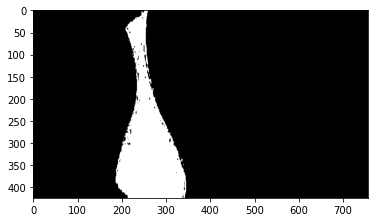

In [11]:
mask = cv2.bitwise_and(mask_blue, mask_red, mask=mask_green)
plt.imshow(mask, cmap='gray')
plt.show()